NAMA : MARIA DWI KURNIASIH

NPM  : 24083010003

MATEMATIKA DISKRIT  A

=== Hasil Nomor 1 ===
Jumlah pola makan dengan skor sehat positif: 232

=== Detail Pola Makan Sehat Positif (10 contoh) ===
   Simulasi  Skor_Sehat  
0   0        1.900000e+00
1   2        3.000000e-01
2   3        7.771561e-16
3   8        3.500000e+00
4  13        3.200000e+00
5  14        1.100000e+00
6  15        7.000000e-01
7  17        1.700000e+00
8  18        2.000000e-01
9  19        4.000000e-01

=== Hasil Nomor 2 ===
Jumlah pola makan dengan sehat > 0 dan sisa uang > 0: 232

=== Detail Pola Makan Sehat Positif & Sisa Uang Positif (10 contoh) ===
   Simulasi  Skor_Sehat    Sisa_Uang
0   0        1.900000e+00  197500.0 
1   2        3.000000e-01  134500.0 
2   3        7.771561e-16  185000.0 
3   8        3.500000e+00  177000.0 
4  13        3.200000e+00  148500.0 
5  14        1.100000e+00  184000.0 
6  15        7.000000e-01  205500.0 
7  17        1.700000e+00  135000.0 
8  18        2.000000e-01  173000.0 
9  19        4.000000e-01  120500.0 


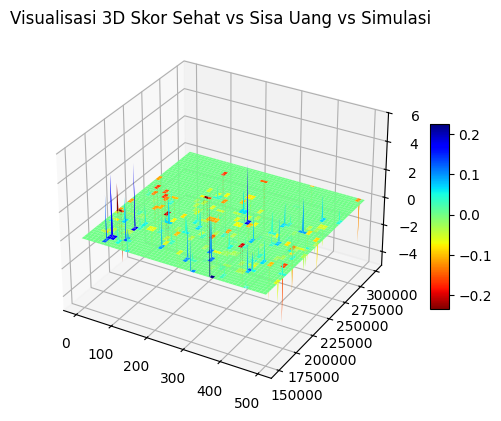


=== Hasil Nomor 3 ===
ID Simulasi : 345
Skor total  : 106.38
Skor sehat  : 3.50
Sisa uang   : 89,500

=== Hasil Nomor 4 ===

=== Jadwal Makan 31 Hari untuk Simulasi Terbaik ===
    Hari Pagi              Malam       
0    1         nasi padang  nasi campur
1    2               bakso     martabak
2    3            mie ayam     martabak
3    4         nasi campur         roti
4    5         nasi goreng       warteg
5    6         ayam geprek  nasi padang
6    7                roti  nasi goreng
7    8         nasi padang  ayam geprek
8    9            tahu tek  nasi padang
9   10                roti  ayam geprek
10  11               bakso  nasi padang
11  12         nasi campur  ayam geprek
12  13         nasi campur   Ayam Katsu
13  14          nasi telur       capcay
14  15         nasi padang       warteg
15  16         nasi padang       dimsum
16  17              dimsum       capcay
17  18              cireng  nasi campur
18  19         ayam geprek       cireng
19  20              di

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==== Asumsi variabel sehat, sisa, skor, resp_pilih, makan, bin_sisa, sampleid sudah ada ====

# =====================================================
# (1) Cari pola makan dengan skor sehat positif
# =====================================================
positif_idx = np.where(sehat > 0)[0]   # pakai sehat (1D), bukan resp_sehat (mungkin 2D)

hasil_nomor1 = pd.DataFrame({
    "Simulasi": positif_idx,
    "Skor_Sehat": sehat[positif_idx]
})

print("=== Hasil Nomor 1 ===")
print(f"Jumlah pola makan dengan skor sehat positif: {len(hasil_nomor1)}")
print("\n=== Detail Pola Makan Sehat Positif (10 contoh) ===")
print(hasil_nomor1.head(10))

# =====================================================
# (2) Cari titik dengan sisa uang positif dari hasil nomor 1
# =====================================================
positif_sisa_idx = [i for i in positif_idx if sisa[i] > 0]

print("\n=== Hasil Nomor 2 ===")
print(f"Jumlah pola makan dengan sehat > 0 dan sisa uang > 0: {len(positif_sisa_idx)}")

hasil_nomor2 = pd.DataFrame({
    "Simulasi": positif_sisa_idx,
    "Skor_Sehat": sehat[positif_sisa_idx],
    "Sisa_Uang": sisa[positif_sisa_idx]
})

print("\n=== Detail Pola Makan Sehat Positif & Sisa Uang Positif (10 contoh) ===")
print(hasil_nomor2.head(10))

# =====================================================
# Visualisasi 3D hubungan Simulasi, Sisa Uang, dan Skor Sehat
# =====================================================
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Y, X = np.meshgrid(bin_sisa, sampleid)

surf = ax.plot_surface(
    X, Y, resp_sehat,   # ini boleh pakai resp_sehat karena biasanya matrix hasil simulasi
    cmap='jet_r',
    edgecolor='none'
)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.title("Visualisasi 3D Skor Sehat vs Sisa Uang vs Simulasi")
plt.show()



# =====================================================
# (3) Cari titik dengan skor terbesar di antara yang sehat > 0
# =====================================================
if len(positif_idx) > 0:
    best_idx = positif_idx[np.argmax(skor[positif_idx])]
    
    print("\n=== Hasil Nomor 3 ===")
    print(f"ID Simulasi : {best_idx}")
    print(f"Skor total  : {skor[best_idx]:.2f}")
    print(f"Skor sehat  : {sehat[best_idx]:.2f}")
    print(f"Sisa uang   : {sisa[best_idx]:,.0f}")


# =====================================================
# (4) Tampilkan jadwal makanan sesuai pilihan terbaik
# =====================================================
print("\n=== Hasil Nomor 4 ===")
print("\n=== Jadwal Makan 31 Hari untuk Simulasi Terbaik ===")

jadwal = []
for hari in range(31):
    pagi_idx  = int(resp_pilih[best_idx][2*hari])
    malam_idx = int(resp_pilih[best_idx][2*hari + 1])
    
    pagi_makan  = makan.iloc[pagi_idx]['makanan']
    malam_makan = makan.iloc[malam_idx]['makanan']
    
    jadwal.append([hari+1, pagi_makan, malam_makan])

jadwal_df = pd.DataFrame(jadwal, columns=["Hari", "Pagi", "Malam"])
print(jadwal_df)

# Simpan ke CSV
jadwal_df.to_csv("jadwal_makanan.csv", index=False)
print("\nFile 'jadwal_makanan.csv' berhasil disimpan!")


Dilihat dari hasil nomor 1, Jumlah pola makan sehat dengan skor sehat positif menghasilkan 232 pola dari 500 simulasi/pola. Kemudian, berdasarkan soal nomor 1 sisa uang yang positif yaitu lebih dari 0 menghasilkan 232 pola.

Pada visualisasi yang telah dihasilkan untuk Skor sehat cukup tinggi karena terdapat lonjakan ke atas berwarna biru. Sedangkan semakin berwarna merah menggambarkan bahwa skor sehat makanan tidak cukup sehat dan warna hijau atau kuning adalah skor sehat makanan tersebut cenderung netral.

Kemudian, titik skor terbesar dari antara simulasi skor sehat positif (232 pola) adalah simulasi ke 345 dengan skor total adalah 106.38 dan skor sehatnya adalah 3.50 serta sisa uangnya adalah 89.500

Sehingga, apabila kita memilih simulasi dengan skor sehat positif terbesar, jadwal makanan yang dapat diterapkan yaitu ada pada output diatas.